## 01.- IMPORTAR LIBRERÍAS Y DATA SETS

In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [86]:
reviews_df = pd.read_csv("amazon_alexa.tsv", sep = "\t")

In [87]:
reviews_df

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [88]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [89]:
reviews_df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [90]:
reviews_df['verified_reviews']

0                                           Love my Echo!
1                                               Loved it!
2       Sometimes while playing a game, you can answer...
3       I have had a lot of fun with this thing. My 4 ...
4                                                   Music
                              ...                        
3145    Perfect for kids, adults and everyone in betwe...
3146    Listening to music, searching locations, check...
3147    I do love these things, i have them running my...
3148    Only complaint I have is that the sound qualit...
3149                                                 Good
Name: verified_reviews, Length: 3150, dtype: object

## 02.- EXPLORAR EL DATASET

<AxesSubplot:>

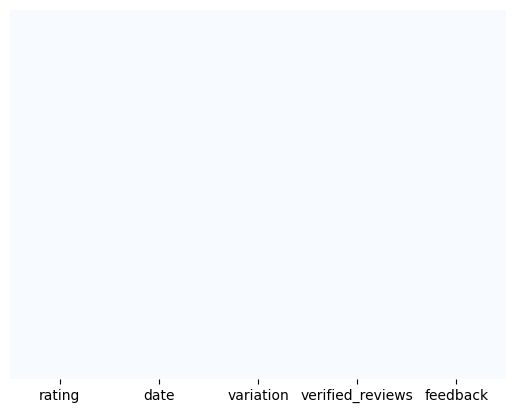

In [91]:
sns.heatmap(reviews_df.isnull(), yticklabels=False, cbar = False, cmap = "Blues")

array([[<AxesSubplot:title={'center':'rating'}>,
        <AxesSubplot:title={'center':'feedback'}>]], dtype=object)

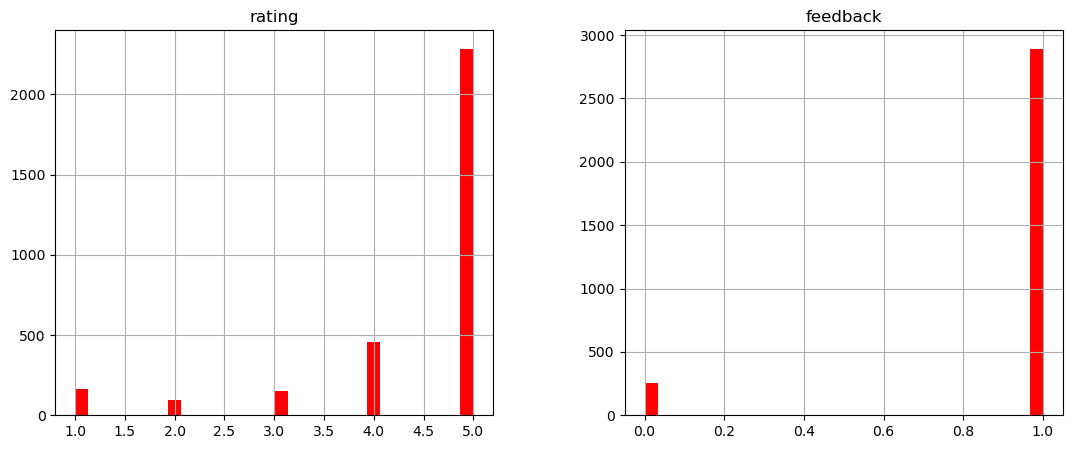

In [92]:
reviews_df.hist(bins = 30, figsize = (13, 5), color = 'r')

In [93]:
reviews_df['length'] = reviews_df['verified_reviews'].apply(len)
reviews_df.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


<AxesSubplot:ylabel='Frequency'>

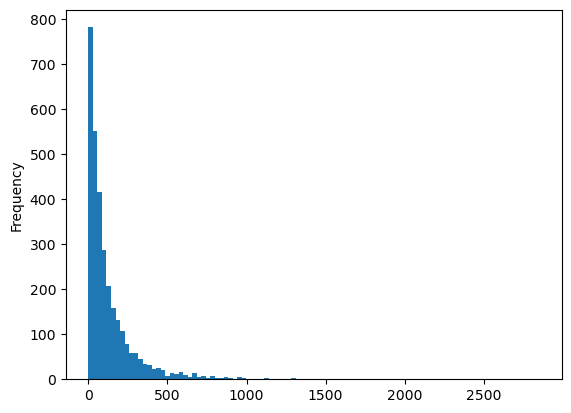

In [94]:
reviews_df['length'].plot(bins = 100, kind = 'hist')

In [95]:
reviews_df.length.describe()

count    3150.000000
mean      132.049524
std       182.099952
min         1.000000
25%        30.000000
50%        74.000000
75%       165.000000
max      2851.000000
Name: length, dtype: float64

In [96]:
reviews_df[reviews_df['length'] == 2851]['verified_reviews'].iloc[0]

"Incredible piece of technology.I have this right center of my living room on an island kitchen counter. The mic and speaker goes in every direction and the quality of the sound is quite good. I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing. It's no audiophile equipment but there is good range and decent bass. The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building. The knob on the top works great for adjusting volume. This is my first Echo device and I would imagine having to press volume buttons (on the Echo 2) a large inconvenience and not as precise. For that alone I would recommend this over the regular Echo (2nd generation).The piece looks quality and is quite sturdy with some weight on it. The rubber material on the bottom has a good grip on the granite counter-- my cat can even rub her scent on it without tipping it over.This order came with a free Phi

In [97]:
reviews_df[reviews_df['length'] == 1]['verified_reviews'].iloc[0]

'😍'

In [98]:
reviews_df[reviews_df['length'] == 133]['verified_reviews'].iloc[0]

'Fun item to play with and get used to using.  Sometimes has hard time answering the questions you ask, but I think it will be better.'

In [99]:
positive = reviews_df[reviews_df['feedback'] == 1]

In [100]:
negative = reviews_df[reviews_df['feedback'] == 0]

In [101]:
negative

,rating,date,variation,verified_reviews,feedback,length
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0,163
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0,53
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0,18
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0,87
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0,20
...,...,...,...,...,...,...
3047,1,30-Jul-18,Black Dot,Echo Dot responds to us when we aren't even ta...,0,120
3048,1,30-Jul-18,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0,37
3067,2,30-Jul-18,Black Dot,The only negative we have on this product is t...,0,240
3091,1,30-Jul-18,Black Dot,I didn’t order it,0,17


In [102]:
positive

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='feedback', ylabel='count'>

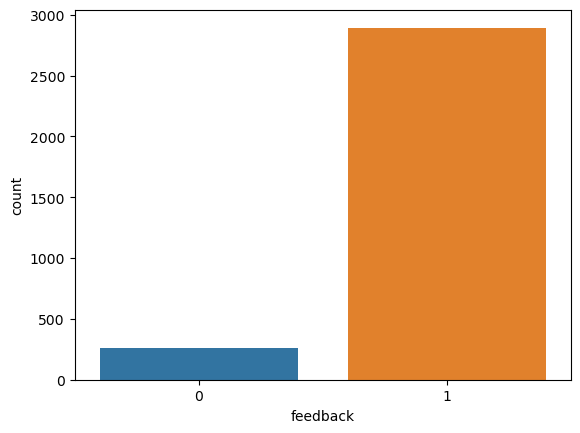

In [103]:
sns.countplot(reviews_df['feedback'], label = "Count")

<AxesSubplot:xlabel='rating', ylabel='count'>

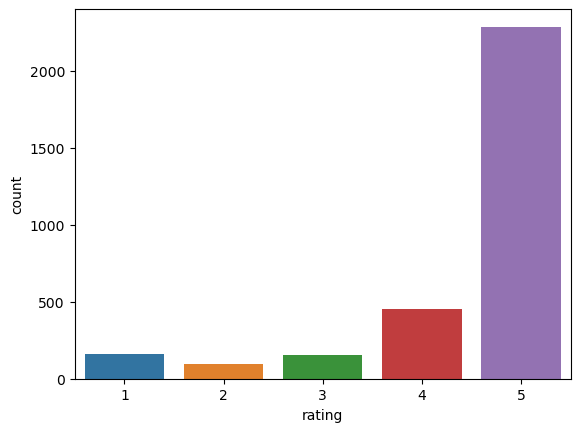

In [104]:
sns.countplot(x = 'rating', data = reviews_df)

<AxesSubplot:>

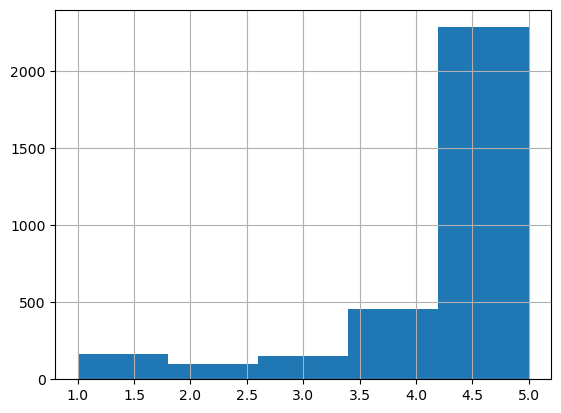

In [105]:
reviews_df['rating'].hist(bins = 5)

<AxesSubplot:xlabel='variation', ylabel='rating'>

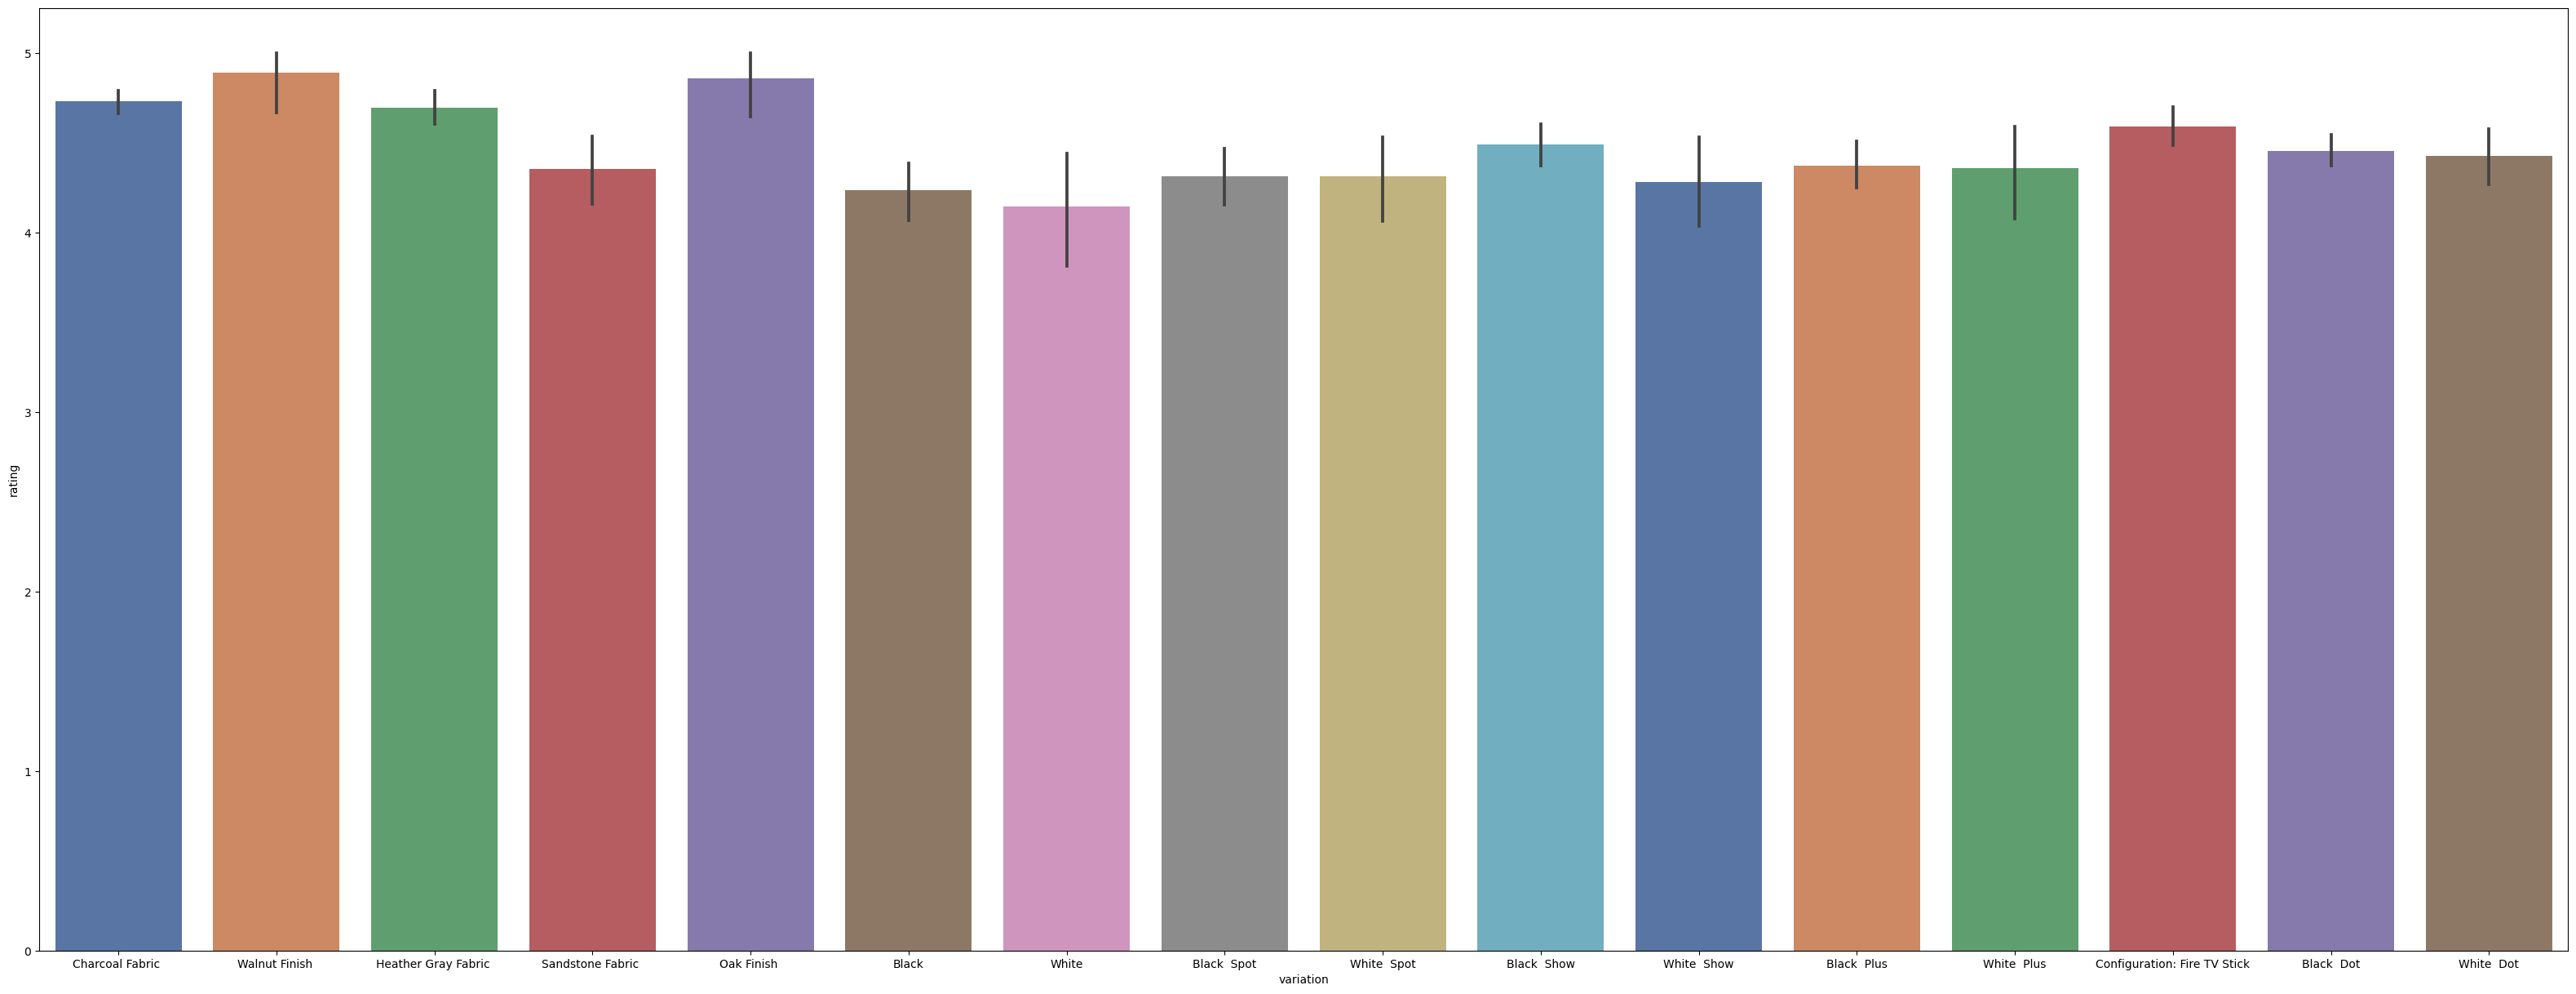

In [106]:
plt.figure(figsize=(40, 15))
sns.barplot(x = 'variation', y = 'rating', data = reviews_df, palette='deep')

In [107]:
sentences = reviews_df['verified_reviews'].tolist()
len(sentences)

3150

In [108]:
print(sentences)

['Love my Echo!', 'Loved it!', 'Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.', 'I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.', 'Music', 'I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.', 'Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet.', "I think this is the 5th one I've purcha

In [109]:
sentences_as_one_string = " ".join(sentences)

In [110]:
sentences_as_one_string

'Love my Echo! Loved it! Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home. I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well. Music I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do. Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet. I think this is the 5th one I\'ve purchased. I\'m working on 

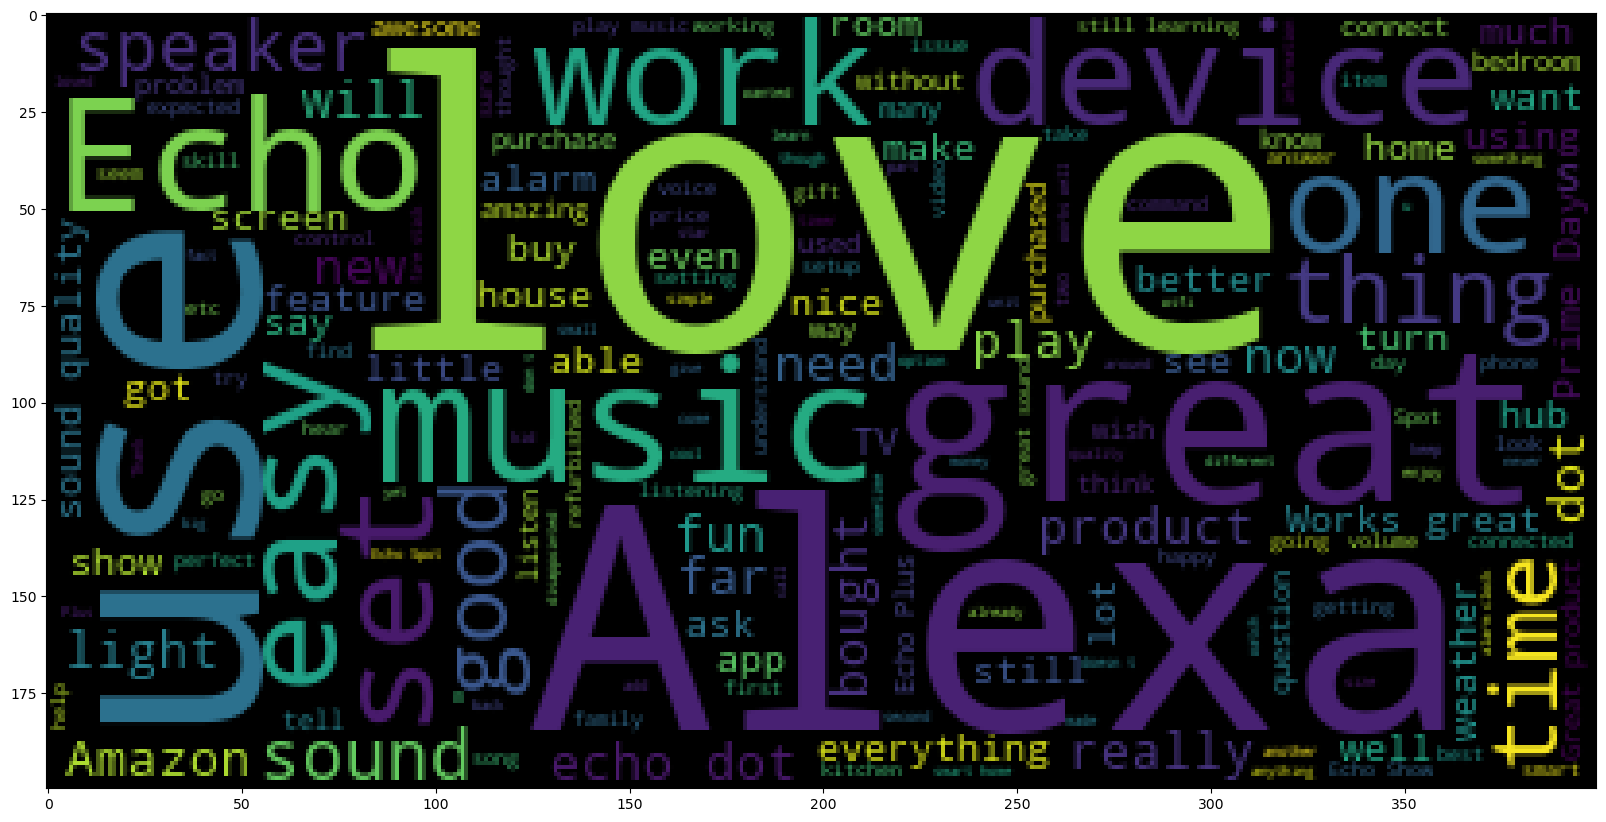

In [111]:
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

In [112]:
negative_list = negative['verified_reviews'].tolist()
negative_list

["It's like Siri, in fact, Siri answers more accurately then Alexa.  I don't see a real need for it in my household, though it was a good bargain on prime day deals.",
 'Sound is terrible if u want good music too get a bose',
 'Not much features.',
 "Stopped working after 2 weeks ,didn't follow commands!? Really fun when it was working?",
 'Sad joke. Worthless.',
 'Really disappointed Alexa has to be plug-in to wall socket all the time.  My fault for not checking this, but made the assumption that a company has technologically advanced as Amazon would sell this product with a rechargeable battery.  If I could return it, I would as my Apple music and boom speaker give me more flexibility the Alexa.',
 "It's got great sound and bass but it doesn't work all of the time. Its still hot or miss when it recognizes things",
 "I am not super impressed with Alexa. When my Prime lapsed, she wouldn't play anything. She isn't smart enough to differentiate among spotify accounts so we can't use it f

In [113]:
negative_sentences_as_one_string = " ".join(negative_list)

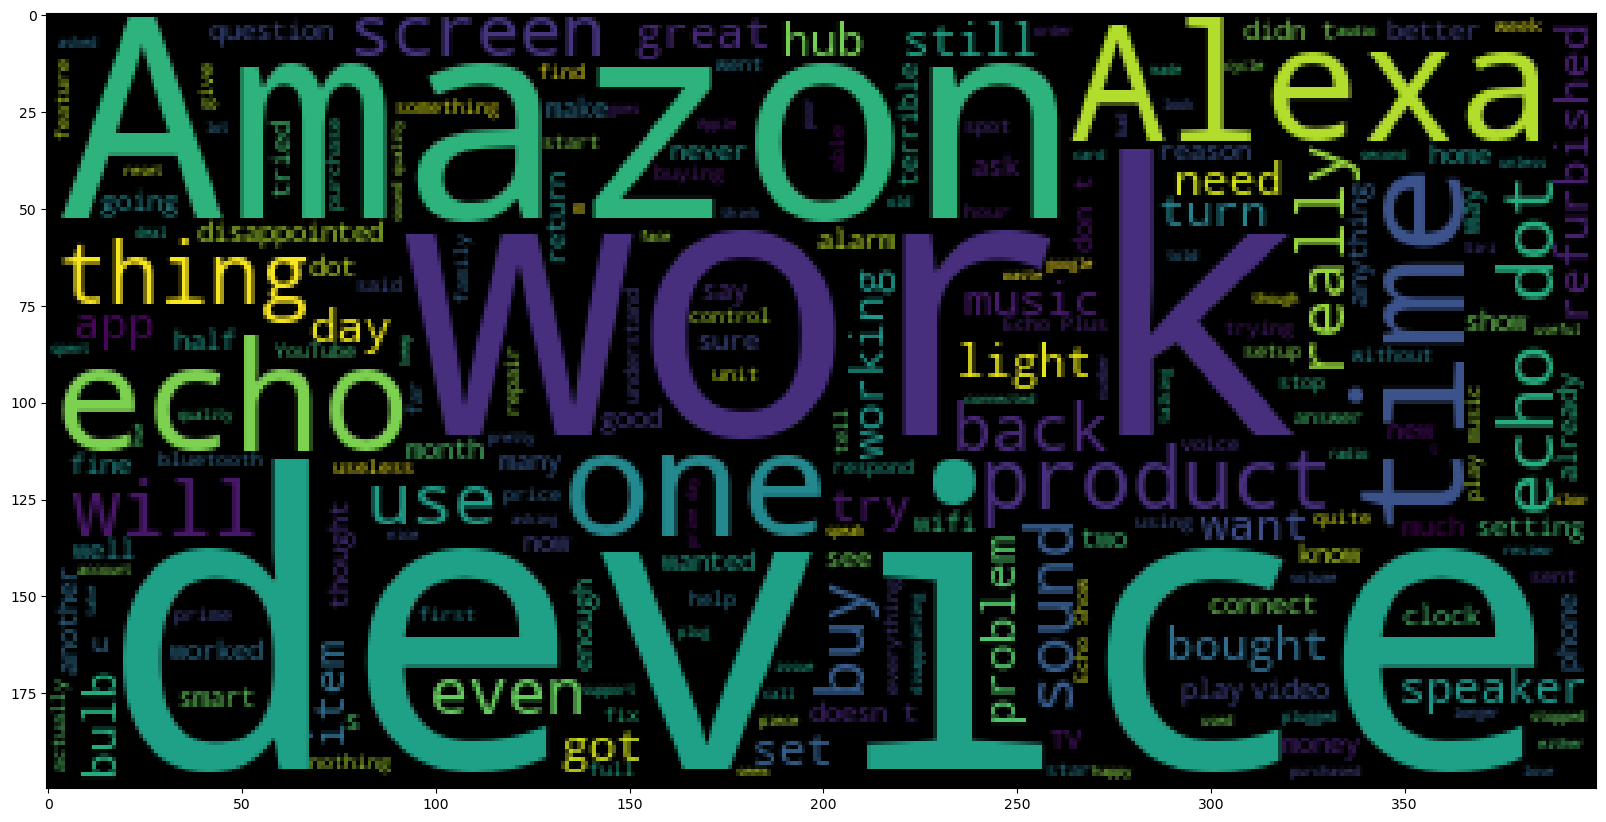

In [114]:
plt.figure(figsize = (20,20))
plt.imshow(WordCloud().generate(negative_sentences_as_one_string))

## 03.- LLEVAR A CABO LA LIMPIEZA DE DATOS

In [115]:
reviews_df.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [116]:
reviews_df = reviews_df.drop(['date', 'rating', 'length'], axis = 1)

In [117]:
reviews_df

,variation,verified_reviews,feedback
0,Charcoal Fabric,Love my Echo!,1
1,Charcoal Fabric,Loved it!,1
2,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,Charcoal Fabric,Music,1
...,...,...,...
3145,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,Black Dot,"Listening to music, searching locations, check...",1
3147,Black Dot,"I do love these things, i have them running my...",1
3148,White Dot,Only complaint I have is that the sound qualit...,1


In [118]:
variation_dummies = pd.get_dummies(reviews_df['variation'], drop_first=True)

In [119]:
variation_dummies

,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [120]:
reviews_df.drop(['variation'], axis = 1, inplace = True)

In [121]:
reviews_df = pd.concat([reviews_df, variation_dummies],axis = 1)

In [122]:
reviews_df

,verified_reviews,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,Love my Echo!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Loved it!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,"Sometimes while playing a game, you can answer...",1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,I have had a lot of fun with this thing. My 4 ...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Music,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,"Perfect for kids, adults and everyone in betwe...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,"Listening to music, searching locations, check...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,"I do love these things, i have them running my...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,Only complaint I have is that the sound qualit...,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


## 04.- APRENDE A ELIMINAR LOS SÍGNOS DE PUNTUACIÓN DEL TEXTO

In [123]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [124]:
Test = "Hello Mr. Future, I am so happy to be learning AI now!!!"

In [125]:
Test_punc_removed = [char for char in Test if char not in string.punctuation]
Test_punc_removed

['H',
 'e',
 'l',
 'l',
 'o',
 ' ',
 'M',
 'r',
 ' ',
 'F',
 'u',
 't',
 'u',
 'r',
 'e',
 ' ',
 'I',
 ' ',
 'a',
 'm',
 ' ',
 's',
 'o',
 ' ',
 'h',
 'a',
 'p',
 'p',
 'y',
 ' ',
 't',
 'o',
 ' ',
 'b',
 'e',
 ' ',
 'l',
 'e',
 'a',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'A',
 'I',
 ' ',
 'n',
 'o',
 'w']

In [126]:
Test_punc_removed_join = ''.join(Test_punc_removed)
Test_punc_removed_join

'Hello Mr Future I am so happy to be learning AI now'

## 05.- ENTENDER COMO LIDIAR LAS STOPWORDS

In [127]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jose.lozas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [128]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [129]:
Test_punc_removed_join

'Hello Mr Future I am so happy to be learning AI now'

In [130]:
Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]

In [131]:
Test_punc_removed_join_clean

['Hello', 'Mr', 'Future', 'happy', 'learning', 'AI']

In [132]:
mini_challenge = "Here is a mini challenge, that will teach you how to remove stopwords and punctuations!!"

In [133]:
challenge = [char for char in mini_challenge if char not in string.punctuation]
challenge = ''.join(challenge)
challenge = [word for word in challenge.split() if word.lower() not in stopwords.words('english')]
challenge

['mini', 'challenge', 'teach', 'remove', 'stopwords', 'punctuations']

## 06.- ENTENDER EL PROCESO DE TOKENIZACIÓN

In [134]:
from sklearn.feature_extraction.text import CountVectorizer

sample_data = ['This is the first document.','This document is the second document.','And this is the third one.','Is this the first document?']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)

In [135]:
print(vectorizer.get_feature_names_out())

['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


In [136]:
print(X.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


In [137]:
mini_challenge = ["Hello World", "Hello Hello World", "Hello World world world"]

vectorizer_challenge = CountVectorizer()
X_challenge = vectorizer_challenge.fit_transform(mini_challenge)
print(vectorizer_challenge.get_feature_names_out())
print(X_challenge.toarray())

['hello' 'world']
[[1 1]
 [2 1]
 [1 3]]


## 07.- LLEVAR A CABO LA LIMPIEZA DE DATOS APLICANDO LO QUE HEMOS APRENDIDO

In [138]:
# Definimos un pipeline para limpiar todos los mensajes
# El pipeline realizamos lo siguiente: (1) eliminar signos de putuación, (2) eliminar las stopwords

def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean


In [139]:
# Probemos la función que acabamos de crear

reviews_df_clean = reviews_df['verified_reviews'].apply(message_cleaning)

In [140]:
print(reviews_df_clean[3])

['lot', 'fun', 'thing', '4', 'yr', 'old', 'learns', 'dinosaurs', 'control', 'lights', 'play', 'games', 'like', 'categories', 'nice', 'sound', 'playing', 'music', 'well']


In [141]:
print(reviews_df['verified_reviews'][3])

I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.


In [142]:
reviews_df_clean

0                                            [Love, Echo]
1                                                 [Loved]
2       [Sometimes, playing, game, answer, question, c...
3       [lot, fun, thing, 4, yr, old, learns, dinosaur...
4                                                 [Music]
                              ...                        
3145                    [Perfect, kids, adults, everyone]
3146    [Listening, music, searching, locations, check...
3147    [love, things, running, entire, home, TV, ligh...
3148    [complaint, sound, quality, isnt, great, mostl...
3149                                               [Good]
Name: verified_reviews, Length: 3150, dtype: object

In [143]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer=message_cleaning)
reviews_countvectorizer = vectorizer.fit_transform(reviews_df['verified_reviews'])

In [144]:
print(vectorizer.get_feature_names_out())

['072318' '1' '10' ... '😬' '😳' '🤓']


In [145]:
print(reviews_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [146]:
reviews_countvectorizer.shape

(3150, 5211)

In [147]:
reviews_df

,verified_reviews,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,Love my Echo!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Loved it!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,"Sometimes while playing a game, you can answer...",1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,I have had a lot of fun with this thing. My 4 ...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Music,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,"Perfect for kids, adults and everyone in betwe...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,"Listening to music, searching locations, check...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,"I do love these things, i have them running my...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,Only complaint I have is that the sound qualit...,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [148]:
reviews_df.drop(['verified_reviews'], axis = 1, inplace = True)

In [149]:
reviews = pd.DataFrame(reviews_countvectorizer.toarray())

In [150]:
reviews_df = pd.concat([reviews_df, reviews], axis = 1)

In [151]:
reviews_df

,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,...,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3146,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3147,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3148,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [152]:
X = reviews_df.drop(['feedback'], axis = 1)
X

,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,...,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3146,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3147,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [153]:
y = reviews_df['feedback']
y

0       1
1       1
2       1
3       1
4       1
       ..
3145    1
3146    1
3147    1
3148    1
3149    1
Name: feedback, Length: 3150, dtype: int64

## 08.- ENTRENAR UN MODELO CLASIFICADOR DE NAÏVE BAYES

In [154]:
X.shape

(3150, 5226)

In [155]:
y.shape

(3150,)

In [156]:
from sklearn.model_selection import train_test_split
X.columns = X.columns.astype(str)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [157]:
from sklearn.naive_bayes import MultinomialNB

nb_multinomial = MultinomialNB()
nb_multinomial.fit(X_train, y_train)

MultinomialNB()

## 09.- VALIDAR LA EFICACIA DEL MODELO ENTRENADO

In [158]:
from sklearn.metrics import classification_report, confusion_matrix

<AxesSubplot:>

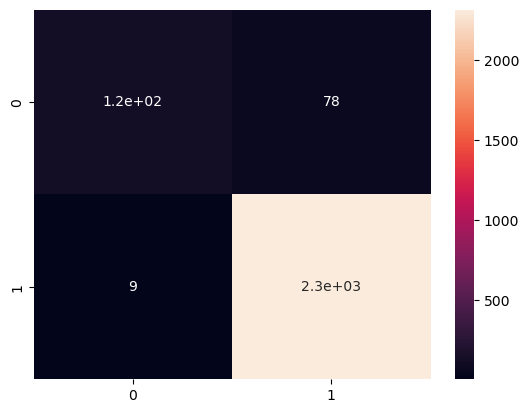

In [159]:
y_predict_train  = nb_multinomial.predict(X_train)
y_predict_train

cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot = True)

<AxesSubplot:>

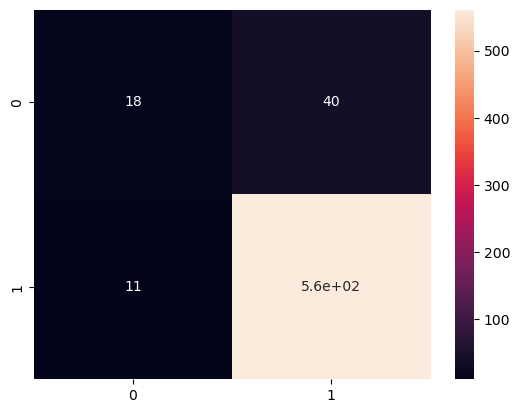

In [160]:
y_predict_test = nb_multinomial.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot = True)


In [161]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.62      0.31      0.41        58
           1       0.93      0.98      0.96       572

    accuracy                           0.92       630
   macro avg       0.78      0.65      0.69       630
weighted avg       0.90      0.92      0.91       630



## 10.- ENTRENAR Y EVALUAR UN MODELO CLASIFICADOR BASADO EN LA REGRESIÓN LOGÍSTICA

In [162]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [163]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [164]:
y_pred = model.predict(X_test)

In [165]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [166]:
print("Accuracy {} %".format(100*accuracy_score(y_test, y_pred)))

Accuracy 93.33333333333333 %


<AxesSubplot:>

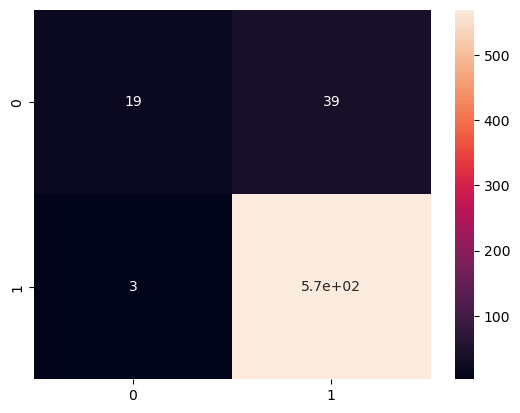

In [167]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)

In [168]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.33      0.48        58
           1       0.94      0.99      0.96       572

    accuracy                           0.93       630
   macro avg       0.90      0.66      0.72       630
weighted avg       0.93      0.93      0.92       630

